In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pickle
import os
import cv2
import pandas as pd

from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [ ]:
train_images = []
train_labels = []
shape = (200,200)
train_path = '/content/drive/MyDrive/DeepLearning/Colab/ObjectDetection/Fruit_Dataset/train_zip/train'

for filename in os.listdir('/content/drive/MyDrive/DeepLearning/Colab/ObjectDetection/Fruit_Dataset/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))

        train_labels.append(filename.split('_')[0])

        img = cv2.resize(img,shape)

        train_images.append(img)

train_labels = pd.get_dummies(train_labels).values

train_images = np.array(train_images)

x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

NameError: name 'os' is not defined

In [ ]:
test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/MyDrive/DeepLearning/Colab/ObjectDetection/Fruit_Dataset/test_zip/test'

for filename in os.listdir('/content/drive/MyDrive/DeepLearning/Colab/ObjectDetection/Fruit_Dataset/test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))

        test_labels.append(filename.split('_')[0])

        img = cv2.resize(img,shape)

        test_images.append(img)

# Converting test_images to array
test_images = np.array(test_images)

In [ ]:
def cnn_model():
    model = keras.Sequential([
        keras.Input(shape=(128, 128, 3)),

        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(4, activation="softmax")  # Adjust number of classes as needed
    ])

    return model

In [ ]:
model = cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,004 (453.14 KB)

 Trainable params: 115,812 (452.39 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_val,y_val))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3516 - loss: 1.3378 - val_accuracy: 0.3833 - val_loss: 1.4980
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.5391 - loss: 1.1216 - val_accuracy: 0.3833 - val_loss: 1.5166
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.7564 - loss: 0.7722 - val_accuracy: 0.5500 - val_loss: 1.1631
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.7664 - loss: 0.7723 - val_accuracy: 0.7500 - val_loss: 0.7036
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.8282 - loss: 0.5941 - val_accuracy: 0.8500 - val_loss: 0.5206
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8391 - loss: 0.5341 - val_accuracy: 0.8333 - val_loss: 0.4820
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8636 - loss: 0.4351 - val_accuracy: 0.5000 - val_loss: 1.7312
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8151 - loss: 0.5250 - val_accuracy: 0.3833 - val

In [ ]:
score = model.evaluate(x_val,y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - accuracy: 0.9125 - loss: 0.8250


In [ ]:
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1] * 100}')

Test loss: 0.8380175828933716
Test accuracy: 89.99999761581421


In [ ]:
save_model_path = '/content/drive/MyDrive/DeepLearning/Colab/ObjectDetection/model.h5'
model.save(save_model_path)

### Load and test model

In [ ]:
load_model_path = '/content/drive/MyDrive/DeepLearning/Colab/ObjectDetection/model.h5'
model = load_model(load_model_path)

In [ ]:
def show_single_prediction(image, actual_label):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

    img_array = np.expand_dims(image, axis=0)  # Expand dimensions for model input
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


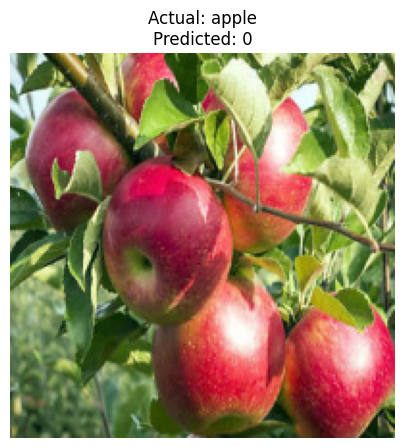

In [ ]:
show_single_prediction(test_images[0], test_labels[0])

In [ ]:
def show_predict_images(images, labels, cols=5):
    rows = (len(images) + cols - 1) // cols  # Calculate number of rows
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 2D array to easily iterate through it

    for i in range(len(images)):
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

        img_array = np.expand_dims(images[i], axis=0)  # Expand dimensions for model input
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction)

        axes[i].imshow(img_rgb)
        axes[i].set_title(f'Actual: {labels[i]}\nPredicted: {predicted_label}')
        axes[i].axis('off')

    # Hide unused subplots
    for i in range(len(images), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━

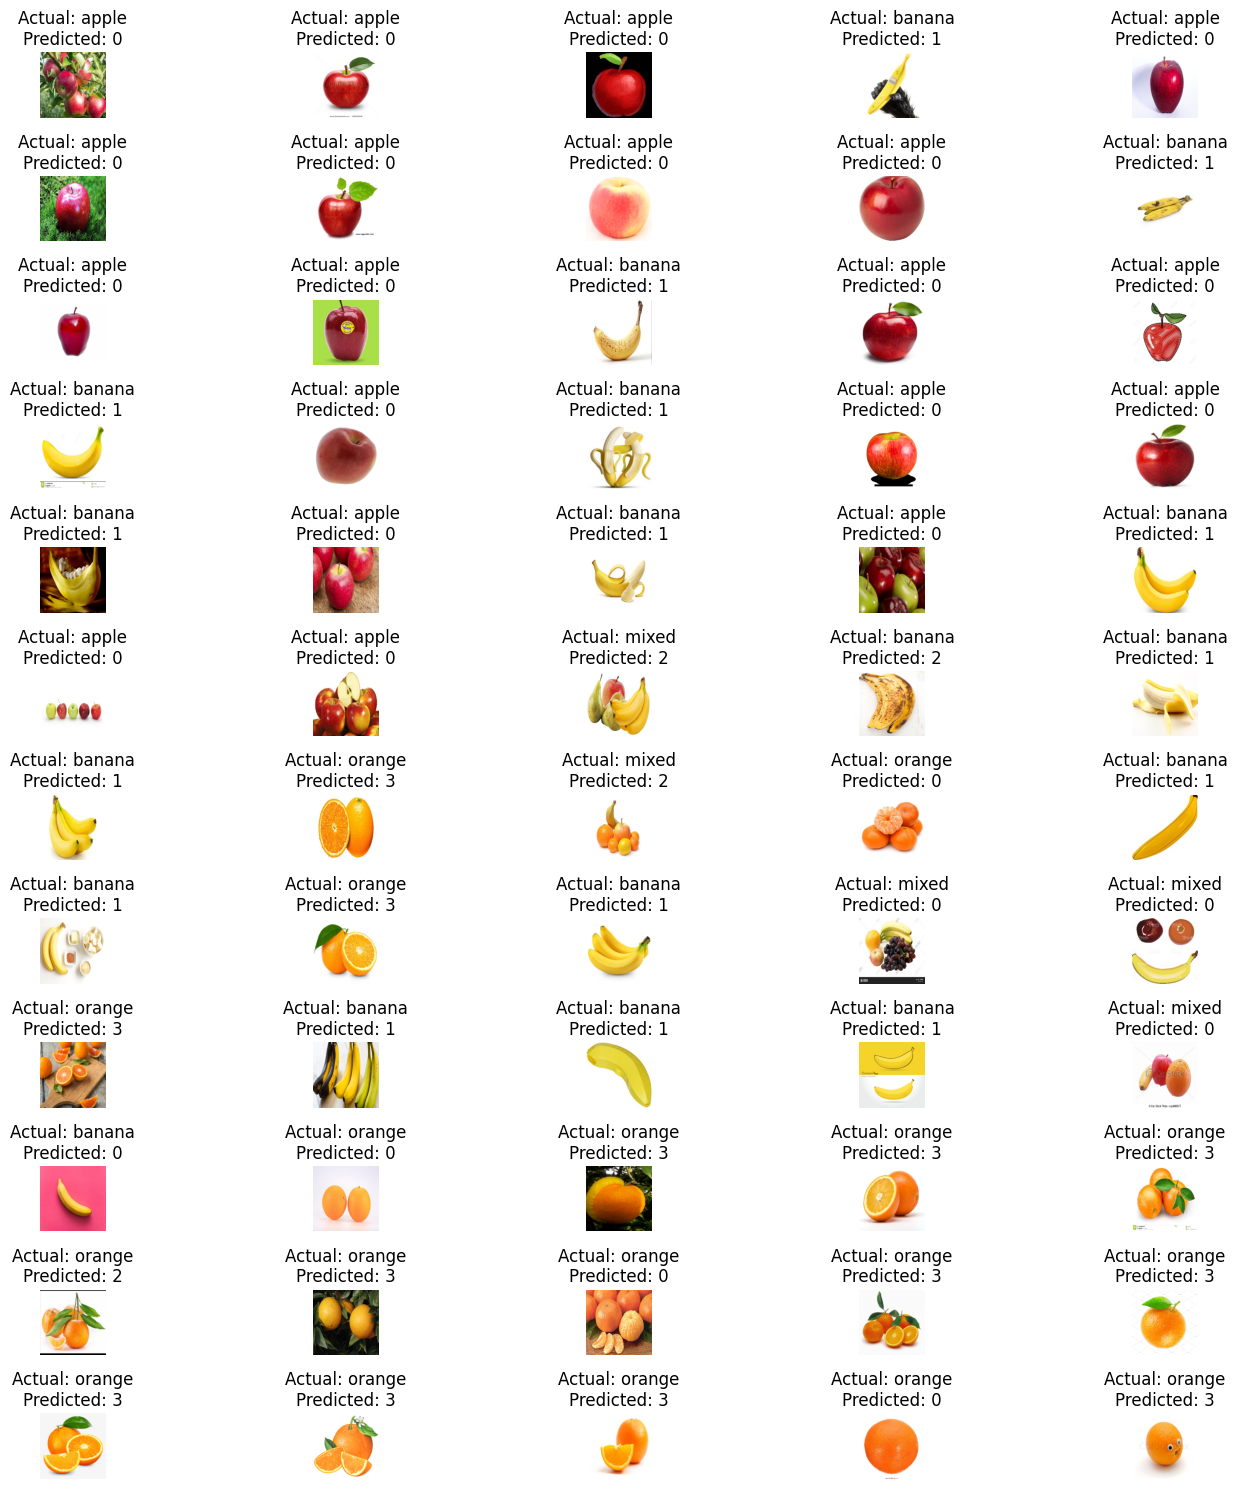

In [ ]:
show_predict_images(test_images, test_labels)